# Estratística com Python - frequências e medidas
## 01 - Qual o seu tipo de dado?
### 01.01 - Carregando os dados

In [1]:
import pandas as pd
dados = pd.read_csv('dados\dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### 01.02 - Tipos de dados
#### Variáveis qualitativas ordinais (Ex.: Faixas de idade)

In [2]:
sorted(dados ['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

#### Variáveis qualitativas discretas

In [3]:
sorted(dados ['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [4]:
sorted(dados ['Sexo'].unique())

[0, 1]

In [5]:
sorted(dados ['Cor'].unique())

[0, 2, 4, 6, 8]

#### Variáveis quantitativas discretas

In [6]:
dados.Idade.min()

13

In [7]:
dados.Idade.max()

99

#### Variáveis quantitativas contínuas

In [8]:
print("De %s até %s metros." %(dados['Altura'].min(), dados['Altura'].max()))

De 1.339244614 até 2.028496765 metros.


## 02 - Distribuição de frequência
### 02.01 - Distribuição de frequências para variáveis qualitativas - Método 01

In [9]:
## 0 - Homens, 1 - Mulheres
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [10]:
# Verificando em percentual
dados['Sexo'].value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [11]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize = True) * 100

In [12]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [13]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


### 02.01 - Distribuição de frequências para variáveis qualitativas - Método 02

In [14]:
sexo = {0: 'Masculino',
        1: 'Feminino'}
cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

In [15]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [16]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [17]:
## Calcula a renda média pela cor x sexo
percentual = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'mean', values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### 02.03 - Distribuição de frequências quantitativas  - Classes Personalizadas

In [18]:
dados.Renda.min()

0

In [19]:
dados.Renda.max()

200000

In [20]:
## Faixas de renda de acordo com o salário mínimo de 2015, data da PNAD de base utilizada.
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E','D','C','B','A']

In [21]:
pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [22]:
frequencia = pd.value_counts(
       pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True)
        )
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [23]:
percentual = pd.value_counts(
       pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True),
        normalize = True
        ) * 100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [24]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia,
     'Porcentagem (%)': percentual})
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [25]:
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


### 02.04 - Distribuição de frequências quantitativas  - Classes de amplitude fixa

In [26]:
import numpy as np

In [27]:
## Regra de Sturges => k = 1 + (10 / 3)log10 n
n = dados.shape[0]
n

76840

In [28]:
k = 1 + (10 / 3) * np.log10(n)
k

17.285291187298853

In [29]:
k = int(k.round(0))
k

17

In [30]:
pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    )
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: Renda, dtype: int64

In [31]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [32]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False,
    normalize = True
) * 100
percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renda, dtype: float64

In [33]:
amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia,
     'Porcentagem (%)': percentual})
amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


### 02.05 - Histograma

In [34]:
import seaborn as sns

C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequências - Altura'}, xlabel='Metros'>

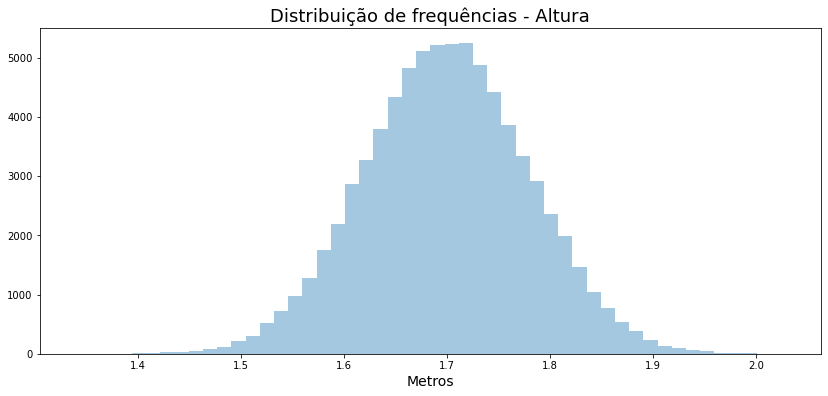

In [35]:
## Histograma via Seaborn
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de frequências - Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:>

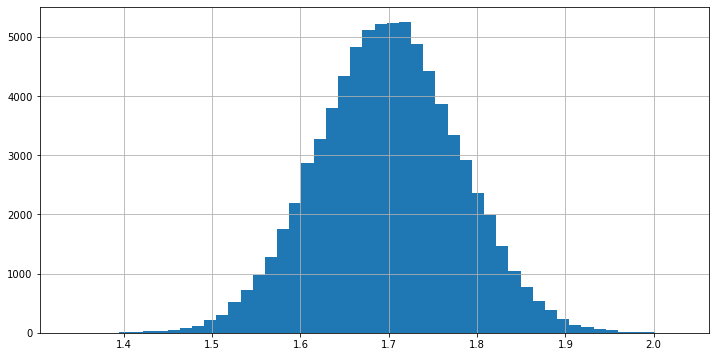

In [36]:
## Histograma via Pandas
dados.Altura.hist(bins = 50, figsize = (12,6))

In [37]:
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


<AxesSubplot:>

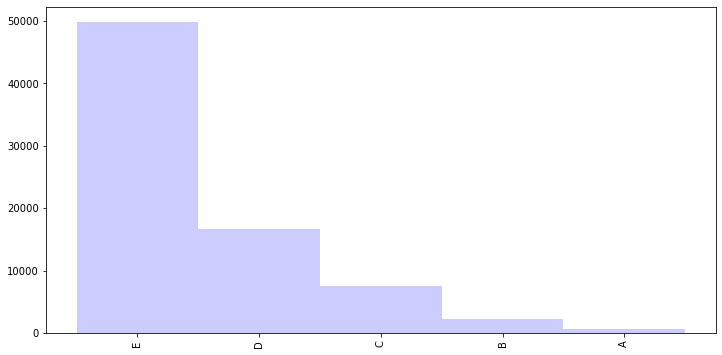

In [38]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize = (12,6))

## 03 - Medidas de tendência central
### 03.01 - Média

In [39]:
df = pd.DataFrame(data = { 'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                      index = ['Matemática',
                              'Portugês',
                              'Inglês',
                              'Geografia',
                              'Hiostória',
                              'Física',
                              'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Portugês,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
Hiostória,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [41]:
df['Fulano'].mean()

7.714285714285714

In [42]:
dados.Renda.mean()

2000.3831988547631

In [43]:
dados.groupby(['Sexo']).mean()

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


In [44]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

### 03.02 - Mediana

In [45]:
notas_fulano = df.Fulano
notas_fulano

Matemática     8
Portugês      10
Inglês         4
Geografia      8
Hiostória      6
Física        10
Química        8
Name: Fulano, dtype: int64

In [46]:
notas_fulano = notas_fulano.sort_values()
notas_fulano

Inglês         4
Hiostória      6
Matemática     8
Geografia      8
Química        8
Portugês      10
Física        10
Name: Fulano, dtype: int64

In [47]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,Hiostória,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Portugês,10
6,Física,10


In [48]:
notas_fulano.median()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_16660\2460163259.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  notas_fulano.median()


Fulano    8.0
dtype: float64

In [49]:
dados.Renda.median()

1200.0

In [50]:
## Divide os dados em 50%, logo, a mediana
dados.Renda.quantile()

1200.0

### 03.03 - Moda

In [53]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [54]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### 03.04 - Relação entre média, mediana e moda


C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda', ylabel='Density'>

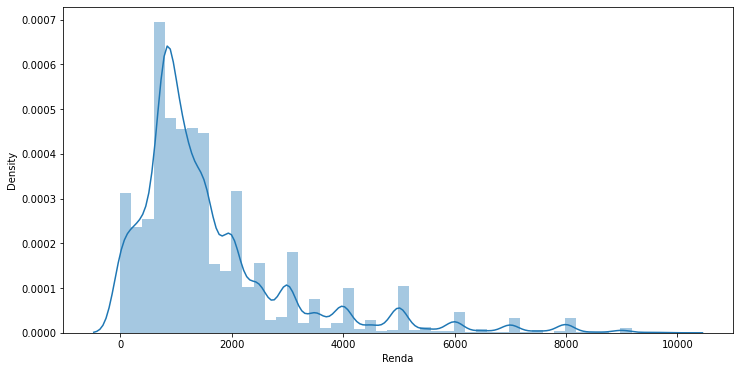

In [57]:
# Assimetria a direita
# Moda < Mediana < Média
ax = sns.distplot(dados.query('Renda < 10000').Renda)
ax.figure.set_size_inches(12,6)
ax

C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Altura', ylabel='Density'>

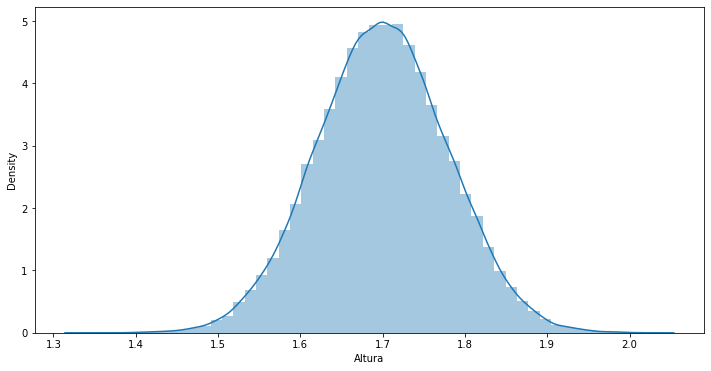

In [61]:
# Simétrica
# Moda = Mediana = Média
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12,6)
ax

C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Anos de Estudo', ylabel='Density'>

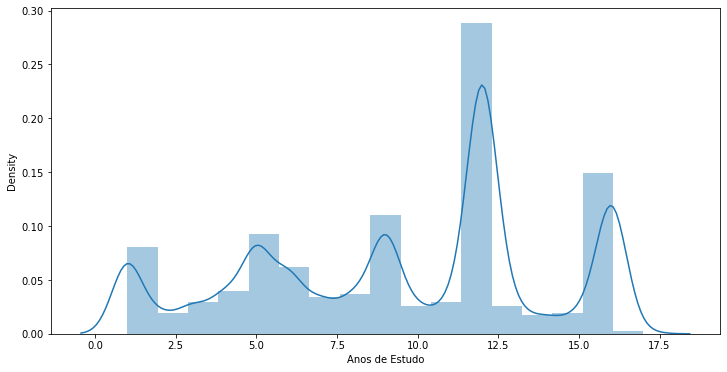

In [62]:
# Assimetria a esquerda
# Moda > Mediana > Média
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12,6)
ax

## 04 - Medidas separatrizes
### 04.01 - Quartis, decis e percentis

In [63]:
# Mediana
dados.Renda.quantile()

1200.0

In [64]:
# 1º 2º e 3º quartis
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [65]:
[i/10 for i in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [66]:
# Percentis
dados.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequências acumulada'}, xlabel='Anos', ylabel='Acumuado'>

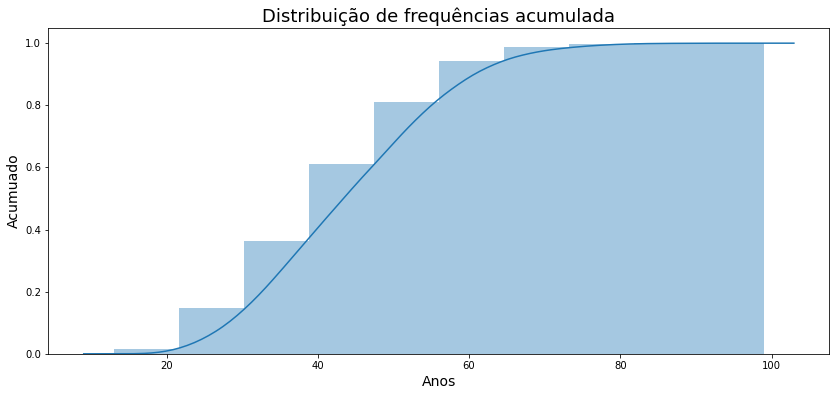

In [71]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de frequências acumulada', fontsize = 18)
ax.set_ylabel('Acumuado', fontsize = 14)
ax.set_xlabel('Anos', fontsize = 14)
ax

In [70]:
dados.Idade.quantile([i/10 for i in range(1,10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

### 04.02 - Boxplot

<AxesSubplot:title={'center':'Distribuição de frequências acumulada'}, xlabel='Metros', ylabel='Altura'>

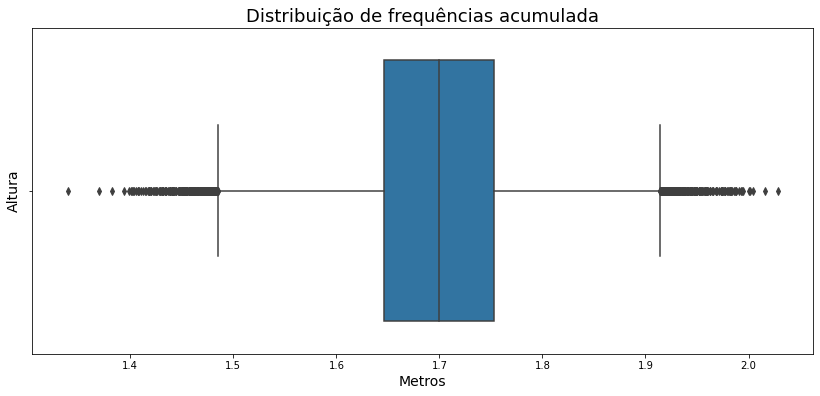

In [74]:
ax = sns.boxplot(x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de frequências acumulada', fontsize = 18)
ax.set_ylabel('Altura', fontsize = 14)
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:title={'center':'Distribuição de frequências acumulada'}, xlabel='Metros', ylabel='Altura'>

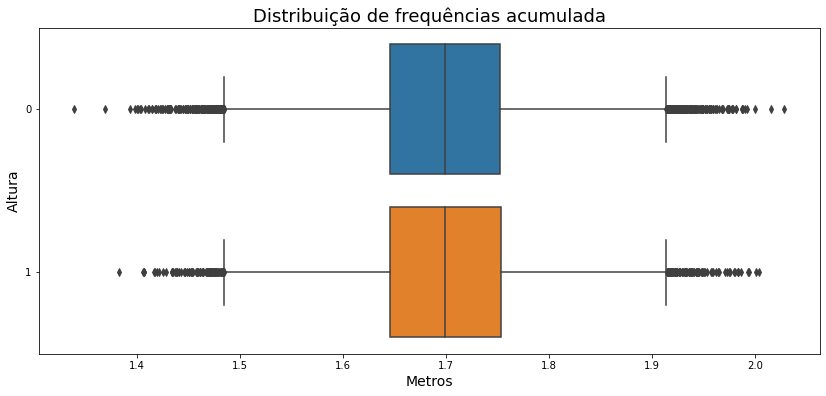

In [76]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de frequências acumulada', fontsize = 18)
ax.set_ylabel('Altura', fontsize = 14)
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:title={'center':'Distribuição de frequências acumulada'}, xlabel='Metros', ylabel='Altura'>

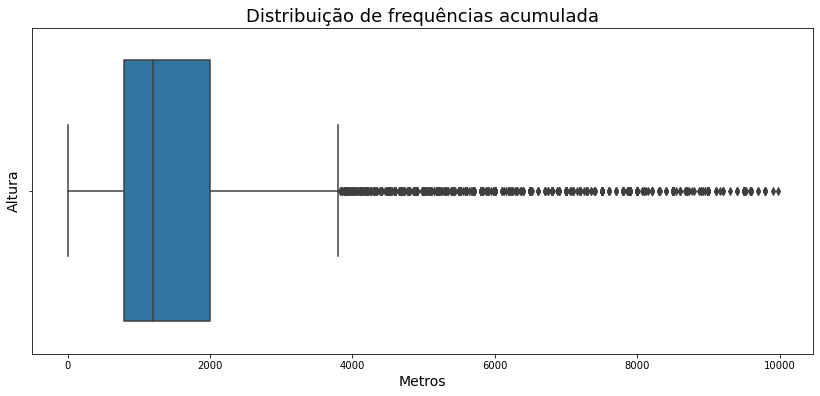

In [79]:
ax = sns.boxplot(x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14,6)
ax.set_title('Renda', fontsize = 18)
ax.set_ylabel('Altura', fontsize = 14)
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:title={'center':'Distribuição de frequências acumulada'}, xlabel='Metros', ylabel='Altura'>

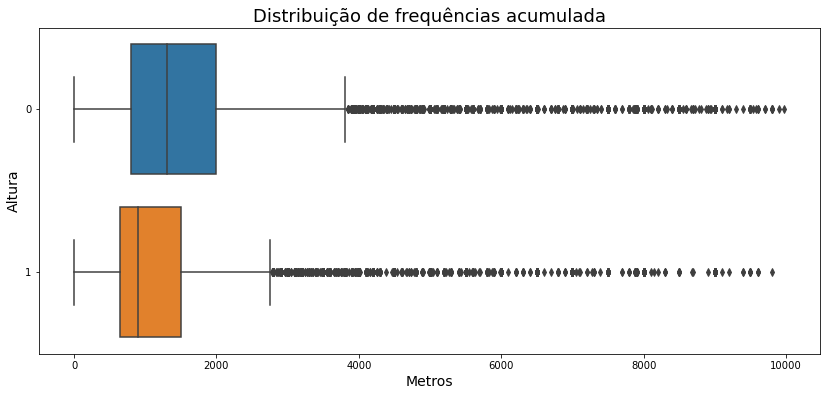

In [80]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14,6)
ax.set_title('Renda', fontsize = 18)
ax.set_ylabel('Altura', fontsize = 14)
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:title={'center':'Anos de estudo'}, xlabel='Metros', ylabel='Altura'>

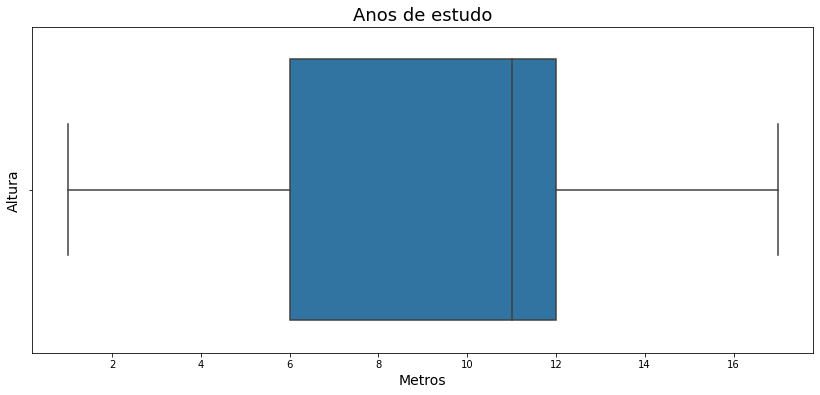

In [82]:
ax = sns.boxplot(x = 'Anos de Estudo', data = dados, orient = 'h')
ax.figure.set_size_inches(14,6)
ax.set_title('Anos de estudo', fontsize = 18)
ax.set_ylabel('Altura', fontsize = 14)
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:title={'center':'Anos de estudo'}, xlabel='Metros', ylabel='Altura'>

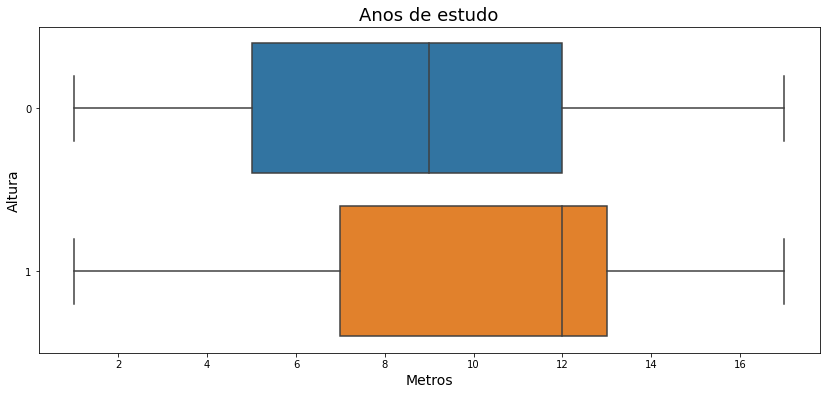

In [84]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(14,6)
ax.set_title('Anos de estudo', fontsize = 18)
ax.set_ylabel('Altura', fontsize = 14)
ax.set_xlabel('Metros', fontsize = 14)
ax

## 05 - Medidas de dispersão
### 05.01 - Desvio médio absoluto

In [85]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Portugês,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
Hiostória,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [86]:
# Fulano e Sicrano tem a mesma média
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [87]:
# Fulano e Sicrano tem a mesma mediana também
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [91]:
# O Desvio médio absoluto calcula o somatório absoluto das notas subtraído da média.
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Portugês,10
Inglês,4
Geografia,8
Hiostória,6
Física,10
Química,8


In [93]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [96]:
notas_fulano['Desvio'] = (notas_fulano['Fulano'] - nota_media_fulano).abs()
notas_fulano

C:\Users\Pichau\AppData\Local\Temp\ipykernel_16660\1618606837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = (notas_fulano['Fulano'] - nota_media_fulano).abs()


Matérias,Fulano,Desvio
Matemática,8,0.285714
Portugês,10,2.285714
Inglês,4,3.714286
Geografia,8,0.285714
Hiostória,6,1.714286
Física,10,2.285714
Química,8,0.285714


In [98]:
# Desvio padrão médio absoluto
notas_fulano['Desvio'].mean()

1.5510204081632648

In [99]:
# Desvio padrão médio absoluto via função
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

1.5510204081632648

### 05.02 - Variância

In [100]:
# A Variância é a soma dos quadrados dos desvios.
notas_fulano['Desvio^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,Desvio^2
Matemática,8,0.285714,0.081633
Portugês,10,2.285714,5.224490
Inglês,4,3.714286,13.795918
Geografia,8,0.285714,0.081633
Hiostória,6,1.714286,2.938776
Física,10,2.285714,5.224490
Química,8,0.285714,0.081633


In [101]:
# Achando a variância
notas_fulano['Desvio^2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [103]:
# Achando a variância via função
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

### 05.03 - Desvio Padrão

In [105]:
# Desvio Padrão é a raiz quadrada da variância. Para melhorar a interpretação visto que a variância foi elevada ao quadrado.
np.sqrt(variancia)

2.1380899352993947

In [107]:
# DP via função
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.1380899352993947

In [108]:
df.std()

Matérias
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64